In [1]:
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import cv2 as cv

In [2]:
def read():
    image_name = input("Emter image name: ")
    image = cv.imread(image_name)
    #image = Image.open(image_name) alternative with pillow
    return image

def save(image):
    new_file_name = input("Enter new file name: ")   
    cv.imwrite(new_file_name, image)

def show(image):
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.figure(figsize=(12,12))
    plt.imshow(image_rgb)
    plt.show()

def crop(image):
    x_range = [int(x) for x in input("Enter two values (x axis range): ").split()]
    y_range = [int(y) for y in input("Enter two values (y axis range): ").split()]
    image_croped = image[x_range[0]:x_range[1], y_range[0]:y_range[1]] 
    return image_croped

def gray_scale(image):
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    return image_gray

def show_hist(image): #has to be grayscale?
    image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    plt.figure(figsize=(12,4))
    plt.hist(image_rgb.ravel(),256,[0,256], color='black')
    plt.show()

Emter image name: venice.jpg


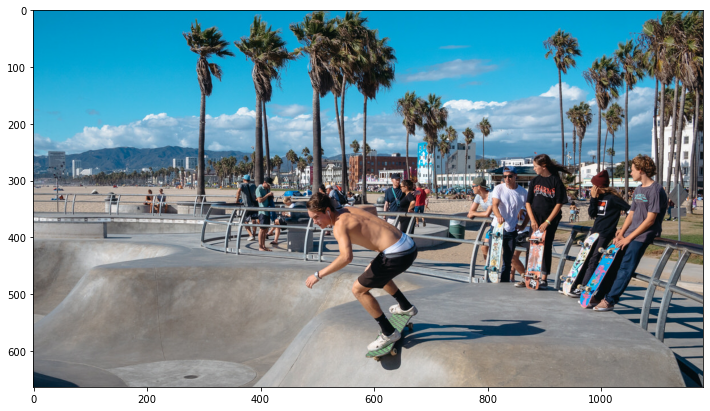

In [70]:
image = read()
show(image)

Enter two values (x axis range): 100 700
Enter two values (y axis range): 100 700


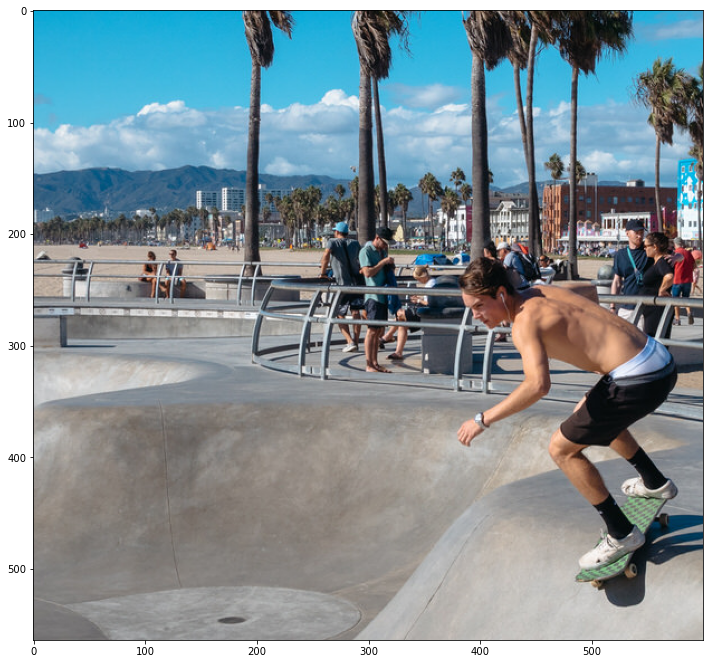

In [54]:
croped_image = crop(image)
show(croped_image)

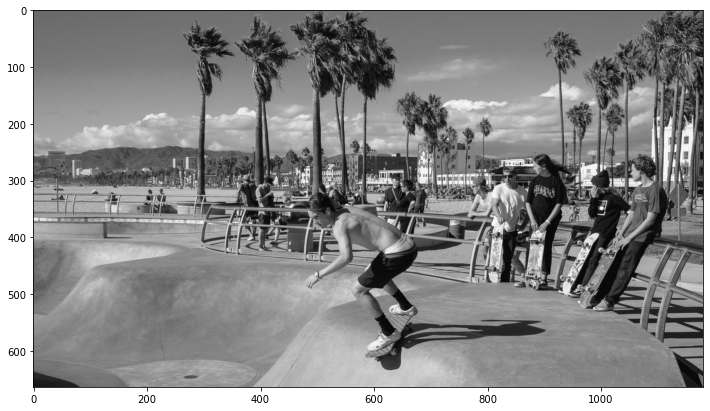

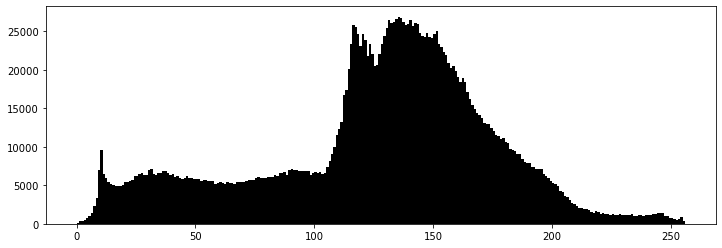

In [63]:
gray_image = gray_scale(image)
show(gray_image)
show_hist(gray_image)

In [189]:
def point_trans_const(image, const): #automatycznie dostaje sie do piksela
    trans_image = image * const
    return np.clip(trans_image, 0, 255)

def point_trans_contrast_dynamic(image, m, e):
    trans_image = 1/(1+(m/image)**e)
    return trans_image

def point_trans_gamma(image, const, gamma):
    trans_image = (image**gamma)*const
    return trans_image
    
    

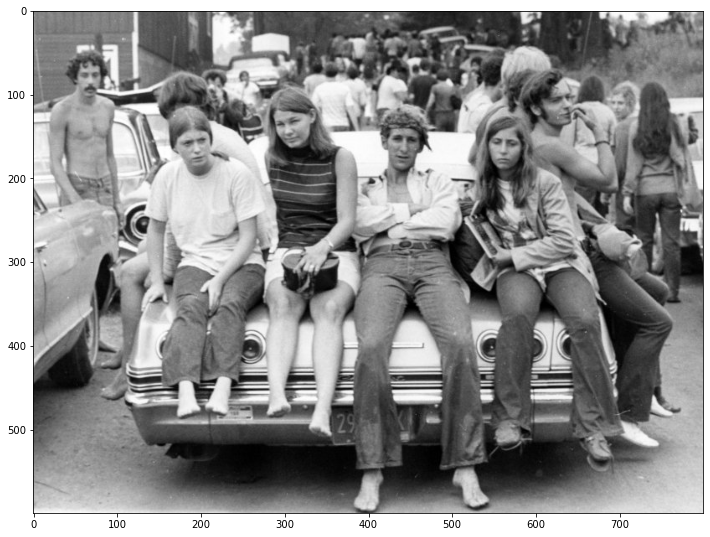

[[[0.5568628  0.5568628  0.5568628 ]
  [0.52156866 0.52156866 0.52156866]
  [0.50980395 0.50980395 0.50980395]
  ...
  [0.7019608  0.7019608  0.7019608 ]
  [0.7137255  0.7137255  0.7137255 ]
  [0.7019608  0.7019608  0.7019608 ]]

 [[0.5529412  0.5529412  0.5529412 ]
  [0.5137255  0.5137255  0.5137255 ]
  [0.5019608  0.5019608  0.5019608 ]
  ...
  [0.6509804  0.6509804  0.6509804 ]
  [0.6627451  0.6627451  0.6627451 ]
  [0.654902   0.654902   0.654902  ]]

 [[0.5529412  0.5529412  0.5529412 ]
  [0.5176471  0.5176471  0.5176471 ]
  [0.50980395 0.50980395 0.50980395]
  ...
  [0.59607846 0.59607846 0.59607846]
  [0.6117647  0.6117647  0.6117647 ]
  [0.6117647  0.6117647  0.6117647 ]]

 ...

 [[0.92941177 0.92941177 0.92941177]
  [0.9372549  0.9372549  0.9372549 ]
  [0.9490196  0.9490196  0.9490196 ]
  ...
  [0.8901961  0.8901961  0.8901961 ]
  [0.89411765 0.89411765 0.89411765]
  [0.89411765 0.89411765 0.89411765]]

 [[0.9529412  0.9529412  0.9529412 ]
  [0.9607843  0.9607843  0.9607843 ]


In [197]:
image = cv.imread("wood.jpg").astype(np.float32) / 255
show(image)
print(image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


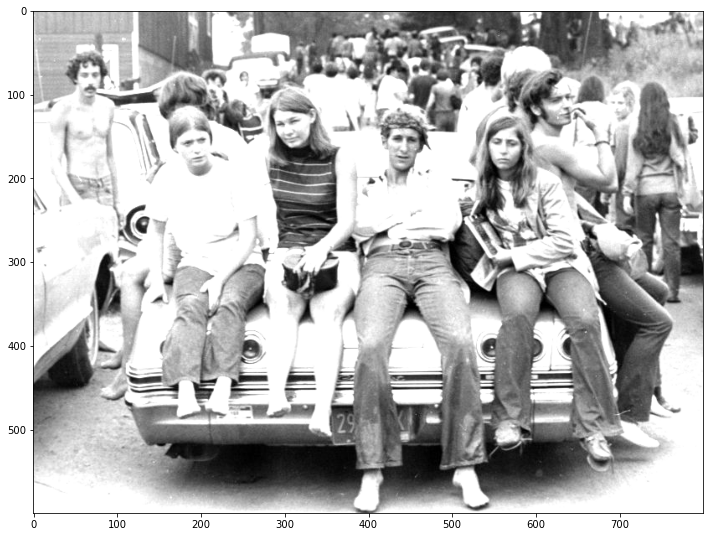

[[[0.8352941  0.8352941  0.8352941 ]
  [0.782353   0.782353   0.782353  ]
  [0.7647059  0.7647059  0.7647059 ]
  ...
  [1.0529412  1.0529412  1.0529412 ]
  [1.0705882  1.0705882  1.0705882 ]
  [1.0529412  1.0529412  1.0529412 ]]

 [[0.8294118  0.8294118  0.8294118 ]
  [0.7705883  0.7705883  0.7705883 ]
  [0.75294125 0.75294125 0.75294125]
  ...
  [0.9764706  0.9764706  0.9764706 ]
  [0.9941177  0.9941177  0.9941177 ]
  [0.982353   0.982353   0.982353  ]]

 [[0.8294118  0.8294118  0.8294118 ]
  [0.77647066 0.77647066 0.77647066]
  [0.7647059  0.7647059  0.7647059 ]
  ...
  [0.8941177  0.8941177  0.8941177 ]
  [0.9176471  0.9176471  0.9176471 ]
  [0.9176471  0.9176471  0.9176471 ]]

 ...

 [[1.3941176  1.3941176  1.3941176 ]
  [1.4058824  1.4058824  1.4058824 ]
  [1.4235294  1.4235294  1.4235294 ]
  ...
  [1.3352941  1.3352941  1.3352941 ]
  [1.3411765  1.3411765  1.3411765 ]
  [1.3411765  1.3411765  1.3411765 ]]

 [[1.4294118  1.4294118  1.4294118 ]
  [1.4411764  1.4411764  1.4411764 ]


In [198]:
trans_image = point_trans_const(image, 1.5)
show(trans_image)
print(trans_image)

C:\Users\wikto\AppData\Local\Temp/ipykernel_29376/3748660968.py:6: RuntimeWarning: divide by zero encountered in true_divide
  trans_image = 1/(1+(m/image)**e)


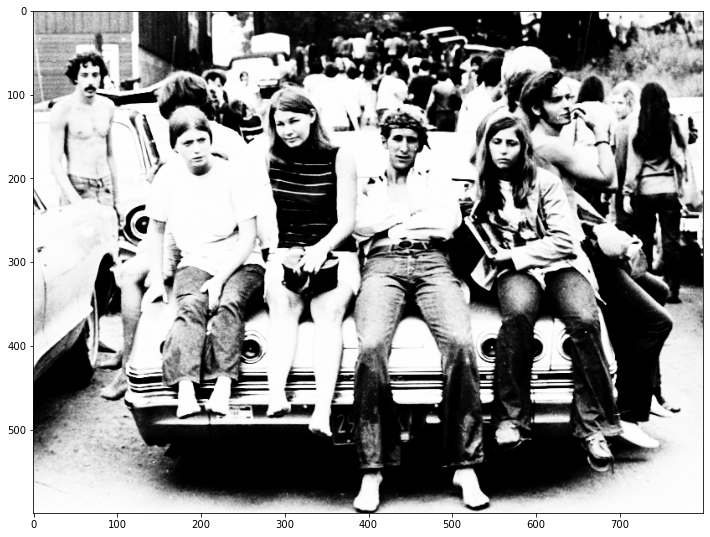

In [199]:
trans_image = point_trans_contrast_dynamic(image, 0.45, 8)
show(trans_image)
#print(trans_image)

C:\Users\wikto\AppData\Local\Temp/ipykernel_29376/3748660968.py:6: RuntimeWarning: divide by zero encountered in true_divide
  trans_image = 1/(1+(m/image)**e)


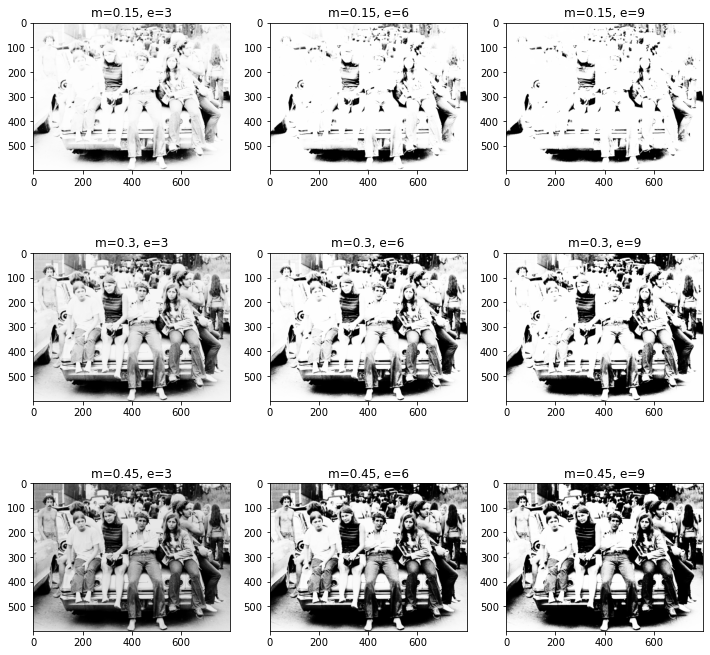

In [200]:
plt.figure(figsize=(12,12))
m = 0
e = 0
for i in range (0,3):
    m = m + 0.15
    e = 0
    for j in range (1,4):
        e = e + 3
        trans_image = point_trans_contrast_dynamic(image, m, e)
        plt.subplot(330 + (i*3)+j)
        plt.imshow(trans_image)
        plt.title(f"m={round(m, 3)}, e={e}")

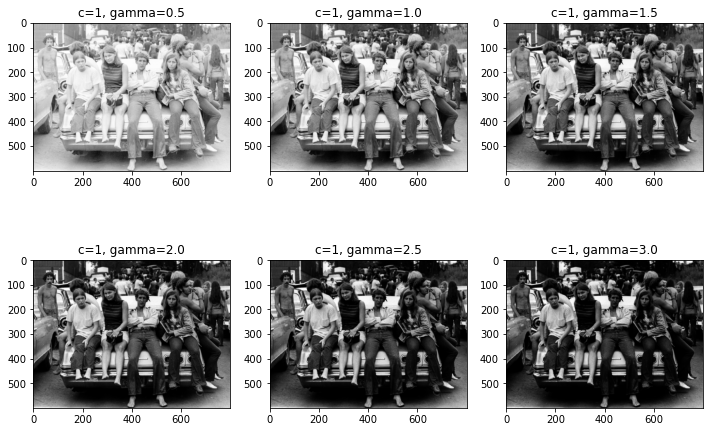

In [201]:
plt.figure(figsize=(12,8))
c = 1
gamma = 0
for i in range (0,2):
    #c = c + 0.5
    #gamma = 0
    for j in range (1,4):
        gamma = gamma + 0.5
        trans_image = point_trans_gamma(image, c, gamma)
        plt.subplot(230 + (i*3)+j)
        plt.imshow(trans_image)
        plt.title(f"c={round(c, 3)}, gamma={round(gamma, 3)}")

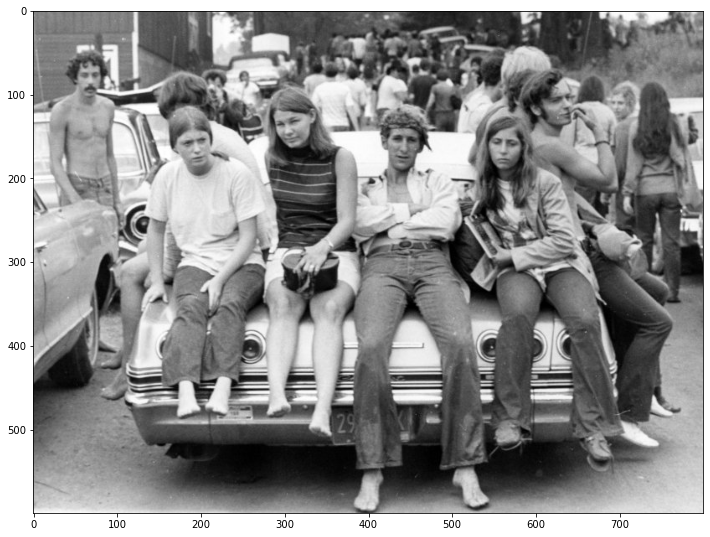

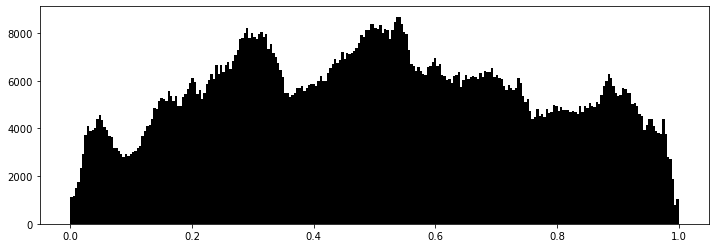

In [7]:
image = cv.imread("wood.jpg").astype(np.float32) / 255
show(image)

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12,4))
plt.hist(image_rgb.ravel(),256,[0,1], color='black')
plt.show()

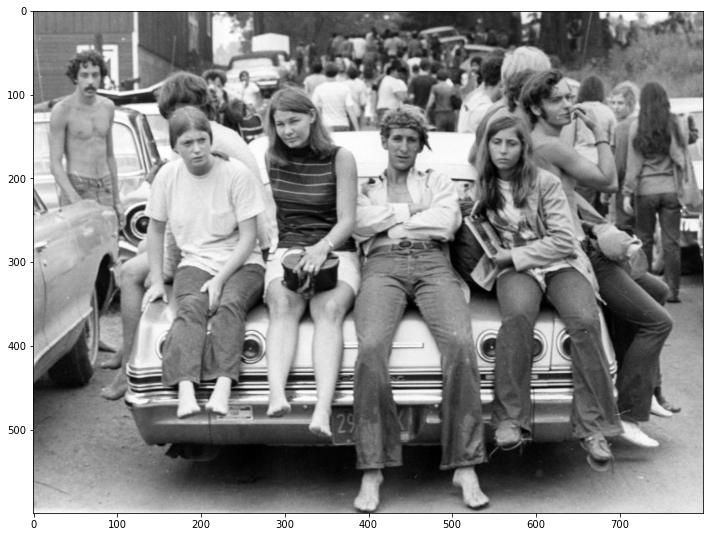

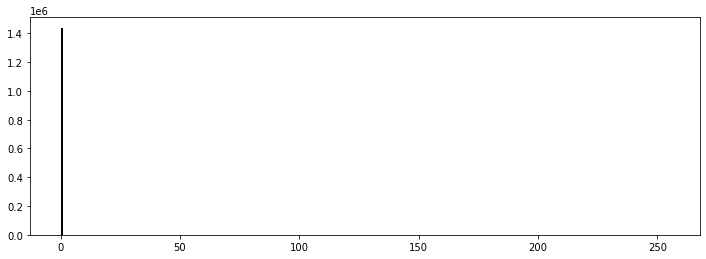

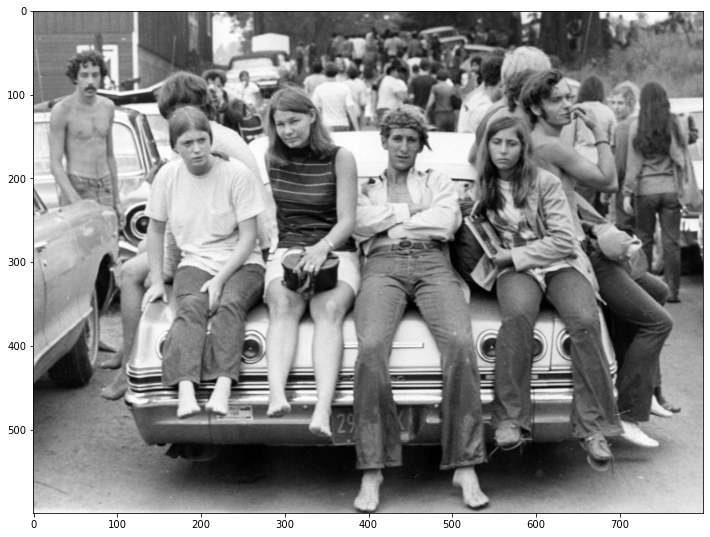

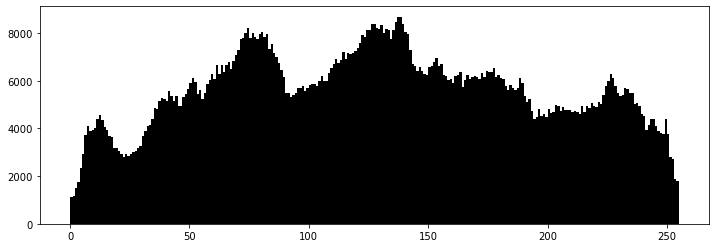

In [8]:
image = gray_scale(image)
#image = np.float32(image) / 255
show(image)

image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12,4))
plt.hist(image_rgb.ravel(),255,[0,255], color='black')
plt.show()

image = np.float32(image) / 255
#image_bright = point_trans_gamma(image, 1, 0.1)
#show(image_bright)

#image_rgb = cv.cvtColor(image_bright, cv.COLOR_BGR2RGB)
#plt.figure(figsize=(12,4))
#plt.hist(image_rgb.ravel(),256,[0,1], color='black')
#plt.show()
norm_image = cv.normalize(image, None, alpha = 0, beta = 255, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)
image = norm_image.astype(np.uint8)

#image = image * 255
#image = np.int32(image)
show(image)
#image = cv.equalizeHist(image)
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.figure(figsize=(12,4))
plt.hist(image_rgb.ravel(),255,[0,255], color='black')
plt.show()
